# Metrics

In [18]:
import pandas as pd
import numpy as np
import glob
import pickle

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

#from utils import utils

### Balancing Techniques

#### NN

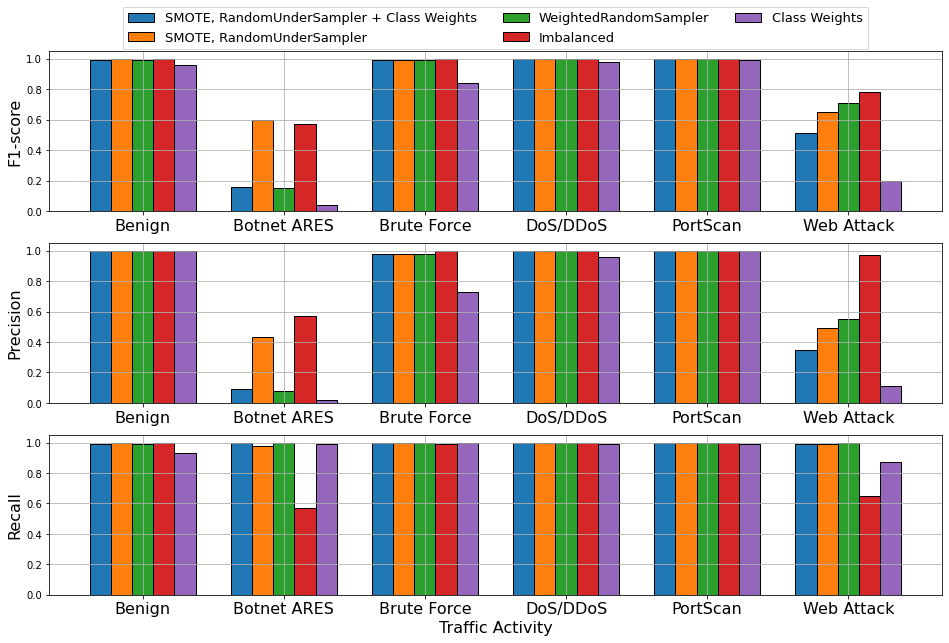

In [2]:
labels = ['Benign', 'Botnet ARES', 'Brute Force', 'DoS/DDoS', 'PortScan', 'Web Attack']


wrc_fscore = [0.99, 0.15, 0.99, 1.00, 1.00, 0.71]
wrc_precision = [1.00, 0.08,  0.98,  1.00,  1.00,  0.55]
wrc_recall = [0.99, 1.00,   1.00,   1.00,   1.00,   1.00]

imb_cw_fscore = [0.96, 0.04, 0.84, 0.98, 0.99, 0.20]
imb_cw_precision = [1.00, 0.02, 0.73, 0.96, 1.00, 0.11]
imb_cw_recall = [0.93, 0.99, 1.00, 0.99, 0.99, 0.87]

imb_fscore = [1.00, 0.57, 1.00, 1.00, 1.00, 0.78]
imb_precision = [1.00, 0.57, 1.00, 1.00, 1.00, 0.97]
imb_recall = [1.00, 0.57, 0.99, 1.00, 1.00, 0.65]

bal_fscore = [1.00, 0.60, 0.99, 1.00, 1.00, 0.65]
bal_precision = [1.00, 0.43, 0.98, 1.00, 1.00, 0.49]
bal_recall = [1.00, 0.98, 1.00, 1.00, 1.00, 0.99]

bal_cw_fscore = [0.99, 0.16, 0.99, 1.00, 1.00, 0.51]
bal_cw_precision = [1.00 , 0.09 , 0.98 , 1.00 , 1.00 , 0.35]
bal_cw_recall = [0.99, 1.00, 1.00, 1.00, 1.00, 0.99]

indexes = np.arange(len(labels))
width = 0.15

fig, ax = plt.subplots(3, 1, figsize=(16, 10))

# F1-Score
rect1 = ax[0].bar(indexes - 2*width, bal_cw_fscore, width, edgecolor="black", label='SMOTE, RandomUnderSampler + Class Weights')
rect2 = ax[0].bar(indexes - 1*width, bal_fscore, width, edgecolor="black", label='SMOTE, RandomUnderSampler')
rect3 = ax[0].bar(indexes + 0*width, wrc_fscore, width, edgecolor="black", label='WeightedRandomSampler')
rect4 = ax[0].bar(indexes + 1*width, imb_fscore, width, edgecolor="black", label='Imbalanced')
rect5 = ax[0].bar(indexes + 2*width, imb_cw_fscore, width, edgecolor="black", label='Class Weights')

ax[0].set_ylabel('F1-score', fontsize=16)
ax[0].set_xticks(indexes)
ax[0].set_xticklabels(labels, fontsize=16)
ax[0].legend(handles=[rect1, rect2, rect3, rect4, rect5], bbox_to_anchor=(0.5, 1.32), ncol=3,
             loc="upper center", shadow=False, fancybox=False, fontsize=13, )
ax[0].grid()
#ax[0].set_title('The performance of the proposed NN based multi-class classification model using different balancing techniques', fontsize=18)

# Precision
rect6 = ax[1].bar(indexes - 2*width, bal_cw_precision, width, edgecolor="black", label='SMOTE, RandomUnderSampler + Class Weights')
rect7 = ax[1].bar(indexes - 1*width, bal_precision, width, edgecolor="black", label='SMOTE, RandomUnderSampler')
rect8 = ax[1].bar(indexes + 0*width, wrc_precision, width, edgecolor="black", label='WeightedRandomSampler')
rect9 = ax[1].bar(indexes + 1*width, imb_precision, width, edgecolor="black", label='Imbalanced')
rect10 = ax[1].bar(indexes + 2*width, imb_cw_precision, width, edgecolor="black", label='Class Weights')

ax[1].set_ylabel('Precision', fontsize=16)
ax[1].set_xticks(indexes)
ax[1].set_xticklabels(labels, fontsize=16)
ax[1].grid()

# Recall
rect11 = ax[2].bar(indexes - 2*width, bal_cw_recall, width, edgecolor="black", label='SMOTE, RandomUnderSampler + Class Weights')
rect12 = ax[2].bar(indexes - 1*width, bal_recall, width, edgecolor="black", label='SMOTE, RandomUnderSampler')
rect13 = ax[2].bar(indexes + 0*width, wrc_recall, width, edgecolor="black", label='WeightedRandomSampler')
rect14 = ax[2].bar(indexes + 1*width, imb_recall, width, edgecolor="black", label='Imbalanced')
rect15 = ax[2].bar(indexes + 2*width, imb_cw_recall, width, edgecolor="black", label='Class Weights')

ax[2].set_ylabel('Recall', fontsize=16)
ax[2].set_xticks(indexes)
ax[2].set_xticklabels(labels, fontsize=16)
ax[2].grid()

plt.xlabel('Traffic Activity', fontsize=16)
plt.show()
fig.savefig('../images/balancing techniques2.pdf')

#### DBN

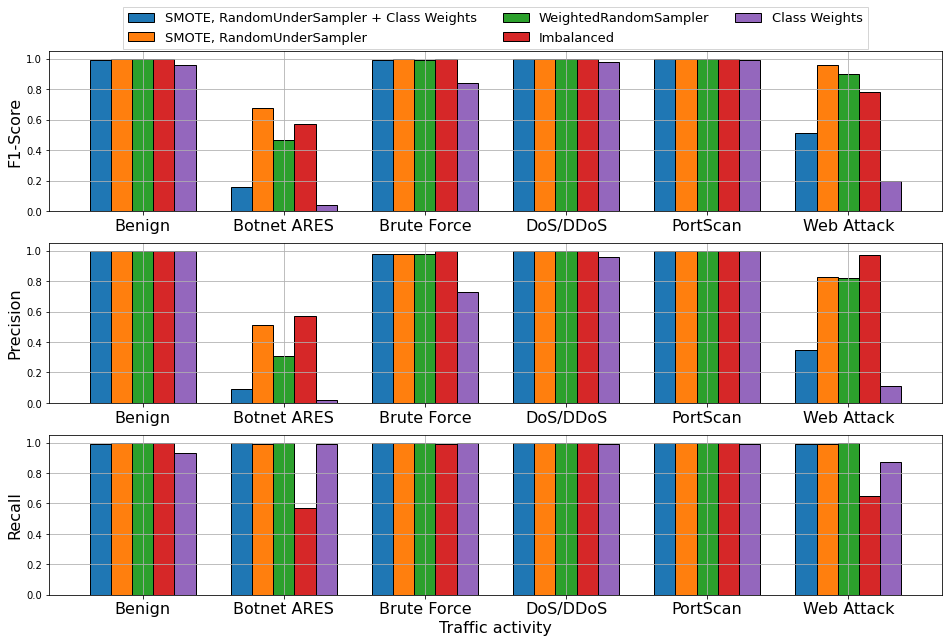

In [3]:
labels = ['Benign', 'Botnet ARES', 'Brute Force', 'DoS/DDoS', 'PortScan', 'Web Attack']

wrc_fscore = [1.00, 0.47, 0.99, 1.00, 1.00, 0.90]
wrc_precision = [1.00, 0.31, 0.98, 1.00, 1.00, 0.82]
wrc_recall = [1.00, 1.00, 1.00, 1.00, 1.00, 1.00]

imb_cw_fscore = [0.96, 0.04, 0.84, 0.98, 0.99, 0.20]
imb_cw_precision = [1.00, 0.02, 0.73, 0.96, 1.00, 0.11]
imb_cw_recall = [0.93, 0.99, 1.00, 0.99, 0.99, 0.87]

imb_fscore = [1.00, 0.57, 1.00, 1.00, 1.00, 0.78]
imb_precision = [1.00, 0.57, 1.00, 1.00, 1.00, 0.97]
imb_recall = [1.00, 0.57, 0.99, 1.00, 1.00, 0.65]

bal_fscore = [1.00, 0.68, 1.00, 1.00, 1.00, 0.96]
bal_precision = [1.00, 0.51, 0.98, 1.00, 1.00, 0.83]
bal_recall = [1.00, 0.99, 1.00, 1.00, 1.00, 0.99]

bal_cw_fscore = [0.99, 0.16, 0.99, 1.00, 1.00, 0.51]
bal_cw_precision = [1.00 , 0.09 , 0.98 , 1.00 , 1.00 , 0.35]
bal_cw_recall = [0.99, 1.00, 1.00, 1.00, 1.00, 0.99]

indexes = np.arange(len(labels))
width = 0.15

fig, ax = plt.subplots(3, 1, figsize=(16, 10))

# F1-Score
rect1 = ax[0].bar(indexes - 2*width, bal_cw_fscore, width, edgecolor="black", label='SMOTE, RandomUnderSampler + Class Weights')
rect2 = ax[0].bar(indexes - 1*width, bal_fscore, width, edgecolor="black", label='SMOTE, RandomUnderSampler')
rect3 = ax[0].bar(indexes + 0*width, wrc_fscore, width, edgecolor="black", label='WeightedRandomSampler')
rect4 = ax[0].bar(indexes + 1*width, imb_fscore, width, edgecolor="black", label='Imbalanced')
rect5 = ax[0].bar(indexes + 2*width, imb_cw_fscore, width, edgecolor="black", label='Class Weights')

ax[0].set_ylabel('F1-Score', fontsize=16)
ax[0].set_xticks(indexes)
ax[0].set_xticklabels(labels, fontsize=16)
ax[0].legend(handles=[rect1, rect2, rect3, rect4, rect5], bbox_to_anchor=(0.5, 1.32), ncol=3,
             loc="upper center", shadow=False, fancybox=False, fontsize=13, )
ax[0].grid()
#ax[0].set_title('The performance of the proposed NN based multi-class classification model using different balancing techniques', fontsize=18)

# Precision
rect6 = ax[1].bar(indexes - 2*width, bal_cw_precision, width, edgecolor="black", label='SMOTE, RandomUnderSampler + Class Weights')
rect7 = ax[1].bar(indexes - 1*width, bal_precision, width, edgecolor="black", label='SMOTE, RandomUnderSampler')
rect8 = ax[1].bar(indexes + 0*width, wrc_precision, width, edgecolor="black", label='WeightedRandomSampler')
rect9 = ax[1].bar(indexes + 1*width, imb_precision, width, edgecolor="black", label='Imbalanced')
rect10 = ax[1].bar(indexes + 2*width, imb_cw_precision, width, edgecolor="black", label='Class Weights')

ax[1].set_ylabel('Precision', fontsize=16)
ax[1].set_xticks(indexes)
ax[1].set_xticklabels(labels, fontsize=16)
ax[1].grid()

# Recall
rect11 = ax[2].bar(indexes - 2*width, bal_cw_recall, width, edgecolor="black", label='SMOTE, RandomUnderSampler + Class Weights')
rect12 = ax[2].bar(indexes - 1*width, bal_recall, width, edgecolor="black", label='SMOTE, RandomUnderSampler')
rect13 = ax[2].bar(indexes + 0*width, wrc_recall, width, edgecolor="black", label='WeightedRandomSampler')
rect14 = ax[2].bar(indexes + 1*width, imb_recall, width, edgecolor="black", label='Imbalanced')
rect15 = ax[2].bar(indexes + 2*width, imb_cw_recall, width, edgecolor="black", label='Class Weights')

ax[2].set_ylabel('Recall', fontsize=16)
ax[2].set_xticks(indexes)
ax[2].set_xticklabels(labels, fontsize=16)
ax[2].grid()

plt.xlabel('Traffic activity', fontsize=16)
plt.show()
fig.savefig('../images/balancing techniques2.pdf')

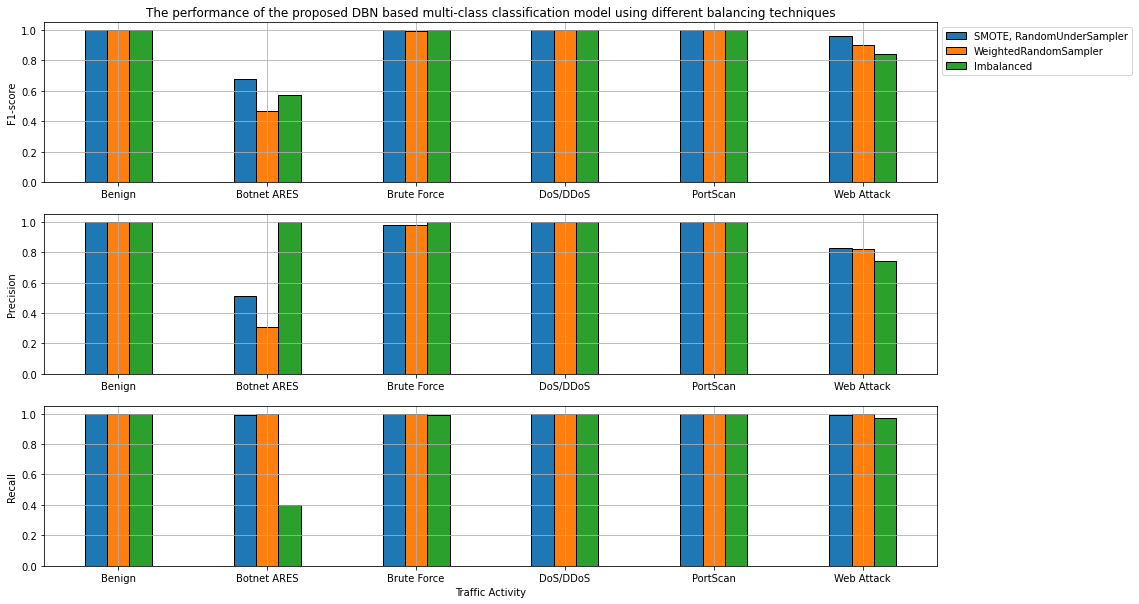

In [4]:
labels = ['Benign', 'Botnet ARES', 'Brute Force', 'DoS/DDoS', 'PortScan', 'Web Attack']

imb_fscore = [1.00, 0.57, 1.00, 1.00, 1.00, 0.84]
imb_precision = [1.00, 1.00, 1.00, 1.00, 1.00, 0.74]
imb_recall = [1.00, 0.40, 0.99, 1.00, 1.00, 0.97]

wrc_fscore = [1.00, 0.47, 0.99, 1.00, 1.00, 0.90]
wrc_precision = [1.00, 0.31, 0.98, 1.00, 1.00, 0.82]
wrc_recall = [1.00, 1.00, 1.00, 1.00, 1.00, 1.00]

bal_fscore = [1.00, 0.68, 1.00, 1.00, 1.00, 0.96]
bal_precision = [1.00, 0.51, 0.98, 1.00, 1.00, 0.83]
bal_recall = [1.00, 0.99, 1.00, 1.00, 1.00, 0.99]

indexes = np.arange(len(labels))
width = 0.15

fig, ax = plt.subplots(3, 1, figsize=(16, 10))

# F1-Score
rect1 = ax[0].bar(indexes - 1*width, bal_fscore, width, edgecolor="black", label='SMOTE, RandomUnderSampler')
rect2 = ax[0].bar(indexes + 0*width, wrc_fscore, width, edgecolor="black", label='WeightedRandomSampler')
rect3 = ax[0].bar(indexes + 1*width, imb_fscore, width, edgecolor="black", label='Imbalanced')

ax[0].set_ylabel('F1-score')
ax[0].set_xticks(indexes)
ax[0].set_xticklabels(labels)
ax[0].legend(handles=[rect1, rect2, rect3], bbox_to_anchor=(1, 1), loc='upper left')
ax[0].grid()
ax[0].set_title('The performance of the proposed DBN based multi-class classification model using different balancing techniques')

# Precision
rect4 = ax[1].bar(indexes - 1*width, bal_precision, width, edgecolor="black", label='SMOTE, RandomUnderSampler')
rect5 = ax[1].bar(indexes + 0*width, wrc_precision, width, edgecolor="black", label='WeightedRandomSampler')
rect6 = ax[1].bar(indexes + 1*width, imb_precision, width, edgecolor="black", label='Imbalanced')

ax[1].set_ylabel('Precision')
ax[1].set_xticks(indexes)
ax[1].set_xticklabels(labels)
ax[1].grid()

# Recall
rect7 = ax[2].bar(indexes - 1*width, bal_recall, width, edgecolor="black", label='SMOTE, RandomUnderSampler')
rect9 = ax[2].bar(indexes + 0*width, wrc_recall, width, edgecolor="black", label='WeightedRandomSampler')
rect9 = ax[2].bar(indexes + 1*width, imb_recall, width, edgecolor="black", label='Imbalanced')

ax[2].set_ylabel('Recall')
ax[2].set_xticks(indexes)
ax[2].set_xticklabels(labels)
ax[2].grid()

plt.xlabel('Traffic Activity')
plt.show()

### Federated Learning

In [14]:
filenames = glob.glob('../metrics/balanced*.pkl')

metrics = [utils.read_pickle(filename) for filename in filenames]

def clean_value(value):
    return [elt2 for elt1, elt2 in value]

def dict_to_list(dictionaty):
    return [dict(zip(dictionaty, t)) for t in zip(*dictionaty.values())]

def write_pickle(content, filename):
    with open(filename, "wb") as write_file:
        pickle.dump(content, write_file)

def read_pickle(filename):
    with open(filename, 'rb') as read_file:
        return pickle.load(read_file)

def process_metrics_report(filename):
    
    metrics = read_pickle(filename)
    metrics_cleaned = dict_to_list({key: clean_value(value) for key, value in metrics.items()})
    df_metrics = pd.json_normalize(metrics_cleaned, sep="_")
    df_metrics.columns = [column.lower().replace('-', '_').replace(' ', '_').replace('model', 'net') for column in df_metrics.columns]
    
    return df_metrics

In [15]:
metrics_cleaned = [{key: clean_value(value) for key, value in metric.items()} for metric in metrics]
metrics_cleaned = [dict_to_list(metric_cleaned) for metric_cleaned in metrics_cleaned]

df_metrics = [pd.json_normalize(metric_cleaned, sep="_") for metric_cleaned in metrics_cleaned]
df_metrics[0].columns = [column.lower().replace('-', '_').replace(' ', '_').replace('model', 'net') for column in df_metrics[0].columns]
df_metrics[1].columns = [column.lower().replace('-', '_').replace(' ', '_').replace('model', 'net') for column in df_metrics[1].columns]
df_metrics[2].columns = [column.lower().replace('-', '_').replace(' ', '_').replace('model', 'net') for column in df_metrics[2].columns]
df_metrics[3].columns = [column.lower().replace('-', '_').replace(' ', '_').replace('model', 'net') for column in df_metrics[3].columns]

IndexError: list index out of range

### What happens if the number of clients increases?

In [7]:
twenty_clients = df_metrics[0].macro_avg_f1_score.values[1:]
five_clients = df_metrics[1].macro_avg_f1_score.values[1:]
fifteen_clients = df_metrics[2].macro_avg_f1_score.values[1:]
seven_clients = df_metrics[3].macro_avg_f1_score.values[1:]

rounds = np.arange(1, len(twenty_clients)+1, 1)

fig, ax = plt.subplots(figsize=(12, 6))

plt.plot(rounds, five_clients, marker='o', label='5 clients')
plt.plot(rounds, seven_clients, marker='o', label='7 clients')
plt.plot(rounds, fifteen_clients, marker='o', label='15 clients')
plt.plot(rounds, twenty_clients, marker='o', label='20 clients')

plt.xticks(rounds)
ax.set_xlabel('round')
ax.set_ylabel('macro-average F1-score')
ax.set_title('The performance (macro-average F1-score) of the proposed NN based multi-class classification model')
plt.legend()
plt.grid()
plt.show()
fig.savefig('../images/number_clients.png')

IndexError: list index out of range

more in-depth analyse

IndexError: list index out of range

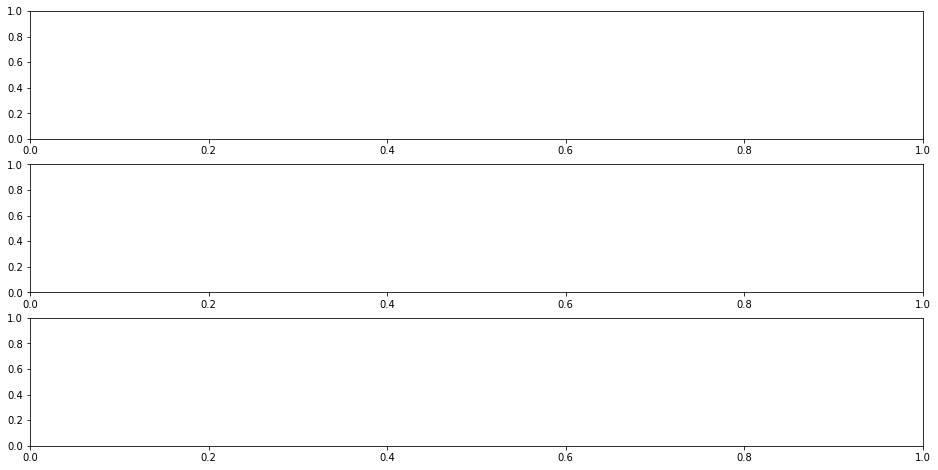

In [16]:
indexes = np.arange(len(labels))
width = 0.15

fig, ax = plt.subplots(3, 1, figsize=(16, 8))

#### F1-Score
f1_score_cols = ['benign_f1_score', 'botnet_ares_f1_score', 'brute_force_f1_score', 'dos/ddos_f1_score', 'portscan_f1_score', 'web_attack_f1_score']

f1_score_tw_cl = df_metrics[0][f1_score_cols].iloc[30].values
f1_score_fv_cl = df_metrics[1][f1_score_cols].iloc[30].values
f1_score_ft_cl = df_metrics[2][f1_score_cols].iloc[30].values
f1_score_sv_cl = df_metrics[3][f1_score_cols].iloc[30].values

rect1 = ax[0].bar(indexes - 2*width, f1_score_fv_cl, width, edgecolor="black", label='5 Clients')
rect2 = ax[0].bar(indexes - 1*width, f1_score_sv_cl, width, edgecolor="black", label='7 Clients')
rect3 = ax[0].bar(indexes + 0*width, f1_score_ft_cl, width, edgecolor="black", label='15 Clients')
rect4 = ax[0].bar(indexes + 1*width, f1_score_tw_cl, width, edgecolor="black", label='20 Clients')

ax[0].set_ylabel('F1-score')
ax[0].set_xticks(indexes)
ax[0].set_xticklabels(labels)
ax[0].legend(handles=[rect1, rect2, rect3, rect4],loc='lower right')
ax[0].set_title("Performance evaluation of the FL-based NN model given the number of clients")
ax[0].grid()

#### Precision
precision_cols = ['benign_precision', 'botnet_ares_precision', 'brute_force_precision', 'dos/ddos_precision', 'portscan_precision', 'web_attack_precision']

precision_tw_cl = df_metrics[0][precision_cols].iloc[30].values
precision_fv_cl = df_metrics[1][precision_cols].iloc[30].values
precision_ft_cl = df_metrics[2][precision_cols].iloc[30].values
precision_sv_cl = df_metrics[3][precision_cols].iloc[30].values

rect5 = ax[1].bar(indexes - 2*width, precision_fv_cl, width, edgecolor="black", label='5 Clients')
rect6 = ax[1].bar(indexes - 1*width, precision_sv_cl, width, edgecolor="black", label='7 Clients')
rect7 = ax[1].bar(indexes + 0*width, precision_ft_cl, width, edgecolor="black", label='15 Clients')
rect8 = ax[1].bar(indexes + 1*width, precision_tw_cl, width, edgecolor="black", label='20 Clients')

ax[1].set_ylabel('Precision')
ax[1].set_xticks(indexes)
ax[1].set_xticklabels(labels)
ax[1].grid()

#### Recall
recall_cols = ['benign_recall', 'botnet_ares_recall', 'brute_force_recall', 'dos/ddos_recall', 'portscan_recall', 'web_attack_recall']

recall_tw_cl = df_metrics[0][recall_cols].iloc[30].values
recall_fv_cl = df_metrics[1][recall_cols].iloc[30].values
recall_ft_cl = df_metrics[2][recall_cols].iloc[30].values
recall_sv_cl = df_metrics[3][recall_cols].iloc[30].values

rect9 = ax[2].bar(indexes - 2*width, recall_fv_cl, width, edgecolor="black", label='5 Clients')
rect10 = ax[2].bar(indexes - 1*width, recall_sv_cl, width, edgecolor="black", label='7 Clients')
rect11 = ax[2].bar(indexes + 0*width, recall_ft_cl, width, edgecolor="black", label='15 Clients')
rect12 = ax[2].bar(indexes + 1*width, recall_tw_cl, width, edgecolor="black", label='20 Clients')

ax[2].set_ylabel('Recall')
ax[2].set_xticks(indexes)
ax[2].set_xticklabels(labels)
ax[2].grid()

plt.xlabel('Traffic Activity')
plt.show()
fig.savefig('../images/number_clients_detail.png')

### DBN vs. NN

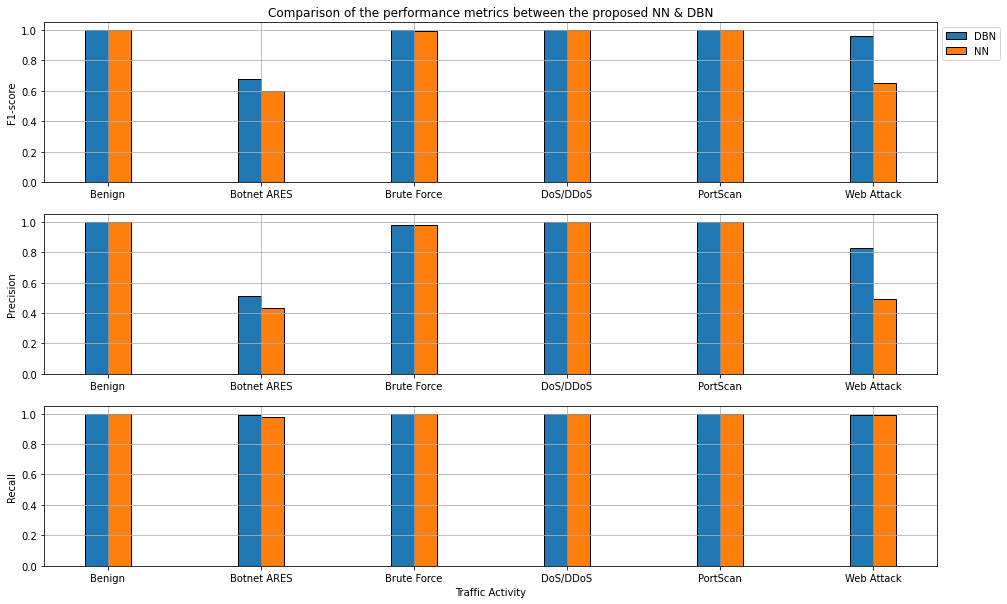

In [4]:
dbn_bal_fscore = [1.00, 0.68, 1.00, 1.00, 1.00, 0.96]
dbn_bal_precision = [1.00, 0.51, 0.98, 1.00, 1.00, 0.83]
dbn_bal_recall = [1.00, 0.99, 1.00, 1.00, 1.00, 0.99]

nn_bal_fscore = [1.00, 0.60, 0.99, 1.00, 1.00, 0.65]
nn_bal_precision = [1.00, 0.43, 0.98, 1.00, 1.00, 0.49]
nn_bal_recall = [1.00, 0.98, 1.00, 1.00, 1.00, 0.99]

indexes = np.arange(len(labels))
width = 0.15

fig, ax = plt.subplots(3, 1, figsize=(16, 10))

# F1-Score
rect1 = ax[0].bar(indexes - 0.5*width, dbn_bal_fscore, width, edgecolor="black", label='DBN')
rect2 = ax[0].bar(indexes + 0.5*width, nn_bal_fscore, width, edgecolor="black", label='NN')

ax[0].set_ylabel('F1-score')
ax[0].set_xticks(indexes)
ax[0].set_xticklabels(labels)
ax[0].legend(handles=[rect1, rect2], bbox_to_anchor=(1, 1), loc='upper left')
ax[0].grid()
ax[0].set_title('Comparison of the performance metrics between the proposed NN & DBN')

# Precision
rect3 = ax[1].bar(indexes - 0.5*width, dbn_bal_precision, width, edgecolor="black", label='DBN')
rect4 = ax[1].bar(indexes + 0.5*width, nn_bal_precision, width, edgecolor="black", label='NN')

ax[1].set_ylabel('Precision')
ax[1].set_xticks(indexes)
ax[1].set_xticklabels(labels)
ax[1].grid()

# Recall
rect5 = ax[2].bar(indexes - 0.5*width, dbn_bal_recall, width, edgecolor="black", label='DBN')
rect6 = ax[2].bar(indexes + 0.5*width, nn_bal_recall, width, edgecolor="black", label='NN')

ax[2].set_ylabel('Recall')
ax[2].set_xticks(indexes)
ax[2].set_xticklabels(labels)
ax[2].grid()

plt.xlabel('Traffic Activity')
plt.show()
fig.savefig('../images/comparison_nn_dbn.pdf')

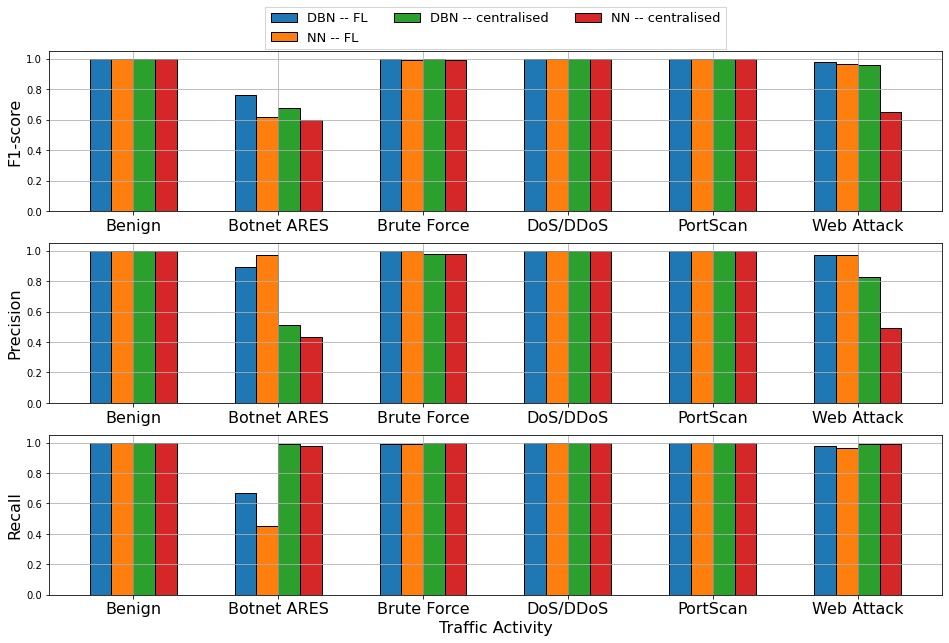

In [28]:
indexes = np.arange(len(labels))
width = 0.15
round_number = 30

three_clients = process_metrics_report('../metrics/3_clients_30_rounds_metrics_20210913_115144AM.pkl')

dbn_bal_fscore = [1.00, 0.68, 1.00, 1.00, 1.00, 0.96]
dbn_bal_precision = [1.00, 0.51, 0.98, 1.00, 1.00, 0.83]
dbn_bal_recall = [1.00, 0.99, 1.00, 1.00, 1.00, 0.99]

nn_bal_fscore = [1.00, 0.60, 0.99, 1.00, 1.00, 0.65]
nn_bal_precision = [1.00, 0.43, 0.98, 1.00, 1.00, 0.49]
nn_bal_recall = [1.00, 0.98, 1.00, 1.00, 1.00, 0.99]

fl_dbn_bal_fscore = [1.00, 0.76, 1.00, 1.00, 1.00, 0.98]
fl_dbn_bal_precision = [1.00, 0.89, 1.00, 1.00, 1.00, 0.97]
fl_dbn_bal_recall = [1.00, 0.67, 0.99, 1.00, 1.00, 0.98]

fig, ax = plt.subplots(3, 1, figsize=(16, 10))

#### F1-Score
f1_score_cols = ['benign_f1_score', 'botnet_ares_f1_score', 'brute_force_f1_score', 'dos/ddos_f1_score', 'portscan_f1_score', 'web_attack_f1_score']

f1_score_th_cl = three_clients[f1_score_cols].iloc[round_number].values

rect1 = ax[0].bar(indexes - 1.5*width, fl_dbn_bal_fscore, width, edgecolor="black", label='DBN -- FL')
rect2 = ax[0].bar(indexes - 0.5*width, f1_score_th_cl, width, edgecolor="black", label='NN -- FL')
rect3 = ax[0].bar(indexes + 0.5*width, dbn_bal_fscore, width, edgecolor="black", label='DBN -- centralised')
rect4 = ax[0].bar(indexes + 1.5*width, nn_bal_fscore, width, edgecolor="black", label='NN -- centralised')

ax[0].set_ylabel('F1-score', fontsize=16)
ax[0].set_xticks(indexes)
ax[0].set_xticklabels(labels, fontsize=16)
ax[0].legend(handles=[rect1, rect2, rect3, rect4], bbox_to_anchor=(0.5, 1.32), ncol=3,
             loc="upper center", shadow=False, fancybox=False, fontsize=13, )
#ax[0].set_title("Performance evaluation of the FL-based NN model given the number of clients", fontsize=16)
ax[0].grid()

#### Precision
precision_cols = ['benign_precision', 'botnet_ares_precision', 'brute_force_precision', 'dos/ddos_precision', 'portscan_precision', 'web_attack_precision']


precision_th_cl = three_clients[precision_cols].iloc[round_number].values

rect5 = ax[1].bar(indexes - 1.5*width, fl_dbn_bal_precision, width, edgecolor="black", label='DBN -- FL')
rect6 = ax[1].bar(indexes - 0.5*width, precision_th_cl, width, edgecolor="black", label='NN -- FL')
rect7 = ax[1].bar(indexes + 0.5*width, dbn_bal_precision, width, edgecolor="black", label='DBN -- centralised')
rect8 = ax[1].bar(indexes + 1.5*width, nn_bal_precision, width, edgecolor="black", label='NN -- centralised')

ax[1].set_ylabel('Precision', fontsize=16)
ax[1].set_xticks(indexes)
ax[1].set_xticklabels(labels, fontsize=16)
ax[1].grid()

#### Recall
recall_cols = ['benign_recall', 'botnet_ares_recall', 'brute_force_recall', 'dos/ddos_recall', 'portscan_recall', 'web_attack_recall']

recall_th_cl = three_clients[recall_cols].iloc[round_number].values

rect9 = ax[2].bar(indexes - 1.5*width, fl_dbn_bal_recall, width, edgecolor="black", label='DBN -- FL')
rect10 = ax[2].bar(indexes - 0.5*width, recall_th_cl, width, edgecolor="black", label='NN -- FL')
rect11 = ax[2].bar(indexes + 0.5*width, dbn_bal_recall, width, edgecolor="black", label='DBN -- centralised')
rect12 = ax[2].bar(indexes + 1.5*width, nn_bal_recall, width, edgecolor="black", label='NN -- centralised')


ax[2].set_ylabel('Recall', fontsize=16)
ax[2].set_xticks(indexes)
ax[2].set_xticklabels(labels, fontsize=16)
ax[2].grid()


plt.xlabel('Traffic Activity', fontsize=16)
plt.show()
fig.savefig('../images/fl_vs_centralised.pdf')

In [ ]:
!open ..